<a href="https://colab.research.google.com/github/FreeeSoul/DataScience/blob/main/FastCampus_3_ch2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,814 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

#2. Load Data 하는 과정

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
plt.rc('font', family='NanumBarunGothic')

In [9]:
file = '/content/drive/MyDrive/data/data_2020_1_12.csv' # 내 컴퓨터에 있는 데이터를 가져오는 과정. 경로복사해서 그냥 넣으면 됨.
data = pd.read_csv(file) # 이것도 강의 들을 때 먼저 공부했던 부분. 우리가 가져온 파일을 csv형태로 바꾸는 과정이다.

In [10]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [13]:
data.info() # 이 함수를 통해 항상 우리가 가져온 데이터가 어떤 형태인지 확인하는 작업이 필요하다.
# 해석하자면 row 가 152870개 있고, columns가 6개 있다는 의미다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


In [14]:
# 서울에서 기흥까지 거리는 20km다. 따라서 도착영업소코드 = 105인 기흥의 값을 20으로 바꾸고 싶고, 나머지 지역도 다 바꾸고 싶다.
# 이렇게 값을 다른 거로 대체하고 싶을 때는 map() 함수를 사용.
data['도착영업소코드'] = data['도착영업소코드'].map({105 : 20, 110 : 77, 115 : 135, 120 : 185, 125 : 240, 130 : 215, 135 : 339, 140 : 407})

In [15]:
data.head(40)

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2
5,20200101,4,101,20,647,2
6,20200101,5,101,20,643,2
7,20200101,5,101,20,800,2
8,20200101,5,101,20,791,2
9,20200101,5,101,20,620,2


In [18]:
# columns의 이름을 바꾸고 싶을 때
data.rename(columns={'도착영업소코드' : '거리'}, inplace=True)

In [19]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


#4. 이제 모델 학습 단계 구성 시작 - keras이용

In [20]:
import tensorflow as tf
import numpy as np

In [23]:
input_data = '2020-01-05' #@param {type:'date'} # 우리가 입력한 
 #날짜 데이터를 그대로 - 빼고 int로 저장하고 싶음 -> replace()함수 이용
input2_data = int(input_data.replace('-', ''))
input2_data

20200105

In [24]:
 # 우리가 입력한 input_data에 맞는 날짜만 추려서 데이터로 저장하자.
 data_renewal = data[data['집계일자'] == input2_data]

In [25]:
data_renewal.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
1527,20200105,15,101,20,1078,6
1528,20200105,15,101,20,947,6
1529,20200105,15,101,20,960,6
1530,20200105,15,101,20,1069,6
1531,20200105,20,101,20,942,6


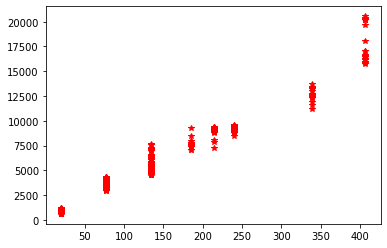

In [27]:
plt.plot(data_renewal['거리'], data_renewal['통행시간'], 'r*') # x축은 거리, y축은 통행시간로 구성된 그래프 그리기

In [30]:
data_time = data_renewal.groupby(['집계일자', '거리'])['통행시간'].mean()

In [31]:
data_time.head()

집계일자      거리 
20200105  20      802.513514
          77     3515.410256
          135    5381.969231
          185    7732.571429
          215    8936.583333
Name: 통행시간, dtype: float64

In [34]:
data_out = data_time.reset_index()
data_out.head(50)

,집계일자,거리,통행시간
0,20200105,20,802.513514
1,20200105,77,3515.410256
2,20200105,135,5381.969231
3,20200105,185,7732.571429
4,20200105,215,8936.583333
5,20200105,240,9059.100000
6,20200105,339,12705.058824
7,20200105,407,17734.571429


In [40]:
# 우리가 데이터프레임 형태에서 가공한 데이터를 텐서플로우에서 사용하기 위해선 리스트형태로 변환 필요.
data_list = data_out.values.tolist()

In [41]:
data_list[0]

[20200105.0, 20.0, 802.5135135135135]

In [48]:
x_train = []
y_train = []

for ele in data_list:
  x_train.append(int(ele[1]))
  y_train.append(int(ele[2] / 10))

In [49]:
y_train

[80, 351, 538, 773, 893, 905, 1270, 1773]

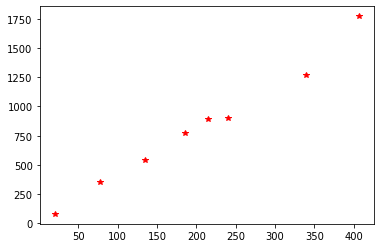

In [51]:
plt.plot(x_train, y_train, 'r*') # 지금 아까 그래프에서는 같은 거리에 있더라도 여러 개의 통행시간이 발생해서 값을 평균 내 거리 하나 당 하나의 y 결과값만
# 존재하게 만들어 준 것이다.

여기까지 데이터셋 가공을 마쳤고, x_train, y_train을 무사히 만들었따.
이제 keras 모델을 만들고, 학습을 할 차례이다.

In [58]:
learning_rate = 0.00001
learning_epochs = 2000

In [57]:
1e8

100000000.0

In [59]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate) # 우리는 경사하강법을 사용해 모델을 학습할 것이니 
# 경사하강 옵티마이저 생성해줌.

In [60]:
mse = tf.keras.losses.mean_squared_error # 손실함수(각 점에 대해 직선에 가까운지 따지는 방법)로는 mean_square_error 사용 

In [61]:
# 이제 옵티마이저 방식 / 손실함수 다 생성해줬으니 모델을 만들어 줄 차례다.
model = tf.keras.models.Sequential() # 케라스에 있는 Sequential 모델 생성
model.add(tf.keras.layers.Dense(1, input_dim=1)) # 모델을 만든 후 레이어를 추가해줬다. unit은 1개고, 입력은 1차원
model.compile(loss=mse, optimizer=sgd) # 모델 학습에 대한 설정을 해주는 부분

In [62]:
# keras에서 모델 학습은 model.fit() 함수를 통해 진행.
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
1/1 [==============================] - 0s 346ms/step - loss: 1261797.3750
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 18785.1250
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 4300.1172
Epoch 4/2000
1/1 [==============================] - 0s 19ms/step - loss: 4131.3174
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 4129.3506
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 4129.3247
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 4129.3276
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 4129.3237
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 4129.3281
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 4129.3262
Epoch 11/2000
1/1 [==============================] - 0s 14ms/step - loss: 4129.3281
Epoch 12/2000
1/1 [==============================] - 0s 16ms/step - loss: 4129.3

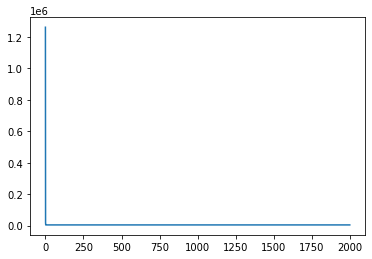

In [65]:
plt.plot(history.history['loss'])
plt.show()

In [66]:
x_train, y_train

([20, 77, 135, 185, 215, 240, 339, 407],
 [80, 351, 538, 773, 893, 905, 1270, 1773])

In [72]:
Distance = 77 #@param {type : 'slider', min : 0, max : 500, step : 1}
input_Data = [Distance]
Result = model.predict(input_Data)
print(Result[0][0] * 10, '초')

1/1 [==============================] - 0s 65ms/step
3136.9638061523438 초


In [ ]:
Result